## Feature Selection

## Dataset from Kaggle
https://www.kaggle.com/competitions/santander-customer-satisfaction/data?select=train.csv

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Santander_Customer_train.csv')

In [51]:
data.shape

(76020, 139)

In [4]:
data.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_ult1',
       'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3',
       ...
       'saldo_medio_var8_ult1', 'saldo_medio_var8_ult3',
       'saldo_medio_var12_ult1', 'saldo_medio_var12_ult3',
       'saldo_medio_var13_corto_hace2', 'saldo_medio_var13_corto_hace3',
       'saldo_medio_var13_corto_ult1', 'saldo_medio_var13_corto_ult3', 'var38',
       'TARGET'],
      dtype='object', length=139)

In [5]:
## checking null values present in the dataset  
cols = [feature for feature in data if data[feature].isnull().sum() > 0]

In [6]:
cols

[]

## Observation:
The dataset doesn't contain any null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 139 entries, var3 to TARGET
dtypes: float64(46), int64(93)
memory usage: 80.6 MB


In [27]:
X = data.drop(['TARGET'],axis=1)
y = data['TARGET']

In [12]:
X.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_ult1',
       'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3',
       ...
       'saldo_medio_var8_hace3', 'saldo_medio_var8_ult1',
       'saldo_medio_var8_ult3', 'saldo_medio_var12_ult1',
       'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_hace2',
       'saldo_medio_var13_corto_hace3', 'saldo_medio_var13_corto_ult1',
       'saldo_medio_var13_corto_ult3', 'var38'],
      dtype='object', length=138)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60816, 138), (60816,), (15204, 138), (15204,))

## Type 1 Feature selection on the dataset having low variance

In [32]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0)

In [33]:
var.fit(X_train)

VarianceThreshold(threshold=0)

In [38]:
## High variance features
sum(var.get_support())

135

In [39]:
X_train.columns[var.get_support()]

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_ult1',
       'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3',
       ...
       'saldo_medio_var8_hace3', 'saldo_medio_var8_ult1',
       'saldo_medio_var8_ult3', 'saldo_medio_var12_ult1',
       'saldo_medio_var12_ult3', 'saldo_medio_var13_corto_hace2',
       'saldo_medio_var13_corto_hace3', 'saldo_medio_var13_corto_ult1',
       'saldo_medio_var13_corto_ult3', 'var38'],
      dtype='object', length=135)

In [40]:
constant = [feature for feature in X_train.columns if feature not in X_train.columns[var.get_support()]]

In [41]:
constant

['num_var27_0', 'saldo_var41', 'saldo_var2_ult1']

## Observation 

['num_var27_0', 'saldo_var41', 'saldo_var2_ult1']

The above features exhibit similar/constant magnitudes, suggesting the possibility of removing some during the model creation process for a more streamlined and efficient model  

In [43]:
X_train.drop(['num_var27_0', 'saldo_var41', 'saldo_var2_ult1'],axis=1,inplace=True)
X_test.drop(['num_var27_0', 'saldo_var41', 'saldo_var2_ult1'],axis=1,inplace=True)

In [44]:
X_train.shape, X_test.shape

((60816, 135), (15204, 135))

## Type 2 Feature Selection using correlation

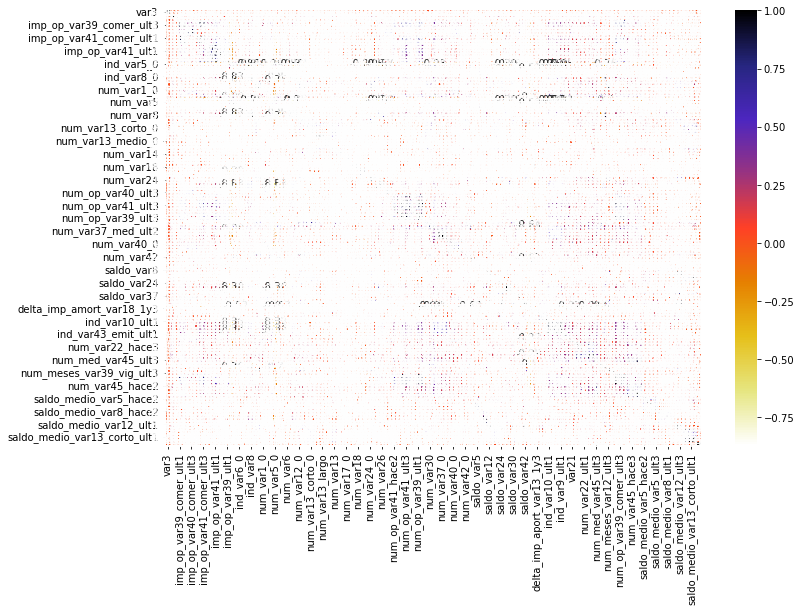

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [48]:
def correlation(dataset, threshold):
    corr = set()
    matrix = dataset.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if matrix.iloc[i,j] > threshold:
                feature_name = matrix.columns[i]
                corr.add(feature_name)
    return corr

In [50]:
correlation(X_train,0.90)

{'delta_imp_amort_var18_1y3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'ind_var10cte_ult1',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_med_var22_ult3',
 'num_meses_var12_ult3',
 'num_meses_var5_ult3',
 'num_meses_var8_ult3',
 'num_op_var39_comer_ult1',
 'num_op_var39_comer_ult3',
 'num_op_var39_hace2',
 'num_op_var39_hace3',
 'num_op_var39_ult1',
 'num_op_var39_ult3',
 'num_op_var40_ult3',
 'num_op_var41_comer_ult1',
 'num_op_var41_ult3',
 'num_var12',
 'num_var13',
 'num_var13_corto',
 'num_var13_largo',
 'num_var13_medio',
 'num_var18',
 'num_var24',
 'num_var26',
 'num_var35',
 'num_var37',
 'num_var37_0',
 'num_var40',
 'num_var40_0',
 'num_var41_0',
 'num_var42_0',
 'num_var45_hace2',
 'num_var45_ult3',
 'num_var5',
 'num_var5_0',
 'num_var6',
 'num_var6_0',
 'num_var8',
 'num_var8_0',
 'saldo_medio_var12_ult1',
 'saldo_medio_var12_ult3',
 'saldo_medio_var13_corto_ult1',
 

## Observation:
I've noticed a high correlation among certain independent features in the list. Removing these features during the model training process could potentially enhance our model's performance.